In [3]:
pip install xgboost

You should consider upgrading via the 'C:\Users\Administrator\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [1]:
import warnings
warnings.filterwarnings('ignore')

# for some basic operations
import numpy as np 
import pandas as pd 
import joypy

# for visualizations
import matplotlib.pyplot as plt

import seaborn as sns
from pandas import plotting
from pandas.plotting import parallel_coordinates

# for interactive visualizations
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# for animated visualizations
from bubbly.bubbly import bubbleplot
import plotly_express as px


data = pd.read_csv("Final Data set v5.csv")

In [11]:
from datetime import datetime

def timer(start_time= None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now()-start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec,2)))


[13:48:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy:  0.9737991266375546
Testing Accuarcy:  0.958250276854928
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8074
           1       0.95      0.64      0.76       956

    accuracy                           0.96      9030
   macro avg       0.96      0.82      0.87      9030
weighted avg       0.96      0.96      0.95      9030


 Time taken: 0 hours 0 minutes and 1.58 seconds.


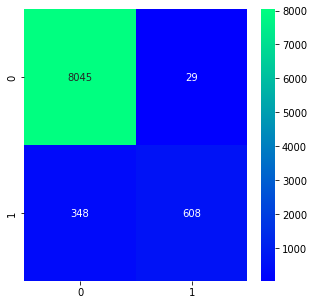

In [12]:
x =  data.iloc[:,0:10]
y = data.iloc[:, -1]
#y = df.iloc[:, -1]

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from numpy import *

np.random.seed(123)                


# diving the data set into trainset and test set

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

start_time = timer(None)
model = XGBClassifier()

model.fit(x_train, y_train)
y_pred_xgb = model.predict(x_test)
y_score_xgb = model.predict_proba(x_test)[:,-1]

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_xgb)
print(cr)

timer(start_time)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot = True, cmap = 'winter', fmt=".0f")
plt.show()

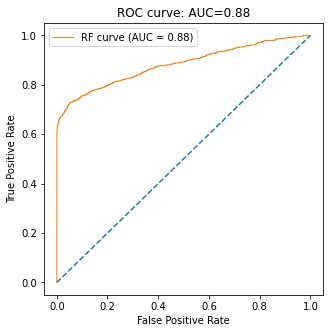

In [7]:
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(y_test))]
lr_probs = model.predict_proba(x_test)
lr_probs = lr_probs[:, 1]
lr_probs


# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

roc_auc_xgb = auc(lr_fpr, lr_tpr)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.plot(lr_fpr, lr_tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_xgb))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC curve: AUC={0:0.2f}'.format(
          roc_auc_rf))
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Average precision-recall score RF: 0.7750171582547667


Text(0.5, 1.0, '2-class Precision-Recall curve: AUC=0.77')

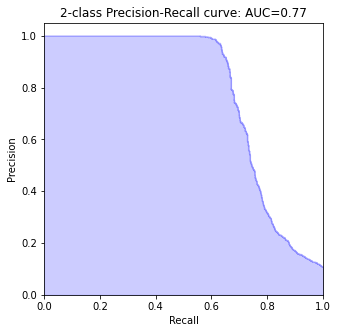

In [8]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve

average_precision = average_precision_score(y_test, y_score_xgb)

print('Average precision-recall score RF: {}'.format(average_precision))

precision, recall, _ = precision_recall_curve(y_test, y_score_xgb)

pr_auc_xgb = auc( recall,precision)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(
          pr_auc_xgb))

[13:49:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy:  0.9529103470181847
Testing Accuarcy:  0.9292199370020382
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      8070
           1       0.96      0.89      0.93      8121

    accuracy                           0.93     16191
   macro avg       0.93      0.93      0.93     16191
weighted avg       0.93      0.93      0.93     16191


 Time taken: 0 hours 0 minutes and 2.99 seconds.


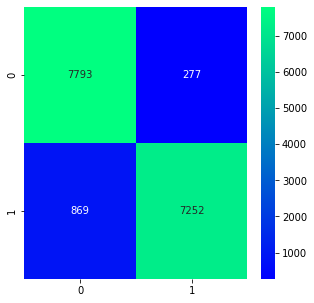

In [13]:
from imblearn.over_sampling import SMOTE

np.random.seed(123)


x_resample, y_resample  = SMOTE().fit_resample(x, y)


x_train2, x_test2, y_train2, y_test2 = train_test_split(x_resample, y_resample, test_size = 0.3, random_state = 0)

start_time = timer(None)

model_o = XGBClassifier()
model_o.fit(x_train2, y_train2)

y_pred = model_o.predict(x_test2)
y_score_xgb = model_o.predict_proba(x_test2)[:,-1]

print("Training Accuracy: ", model_o.score(x_train2, y_train2))
print('Testing Accuarcy: ', model_o.score(x_test2, y_test2))

# classification report
cr = classification_report(y_test2, y_pred)
print(cr)
timer(start_time)

# confusion matrix
cm = confusion_matrix(y_test2, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'winter',fmt=".0f")
plt.show()


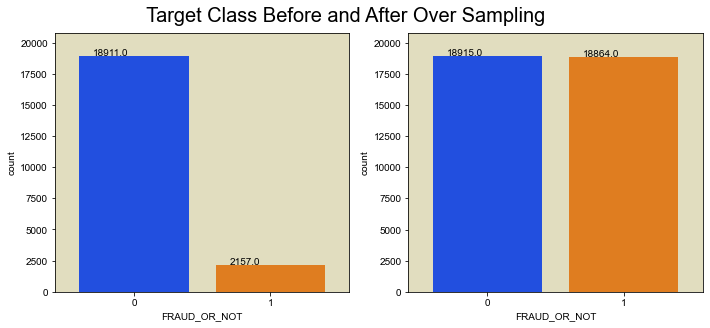

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4.5))
fig.subplots_adjust(bottom=0.10, left=0.10, top = 0.900, right=1.00)
fig.suptitle(' Target Class Before and After Over Sampling', fontsize = 20)
sns.set_palette("bright")
sns.countplot(y_train, ax=ax1)
ax1.margins(0.1)
ax1.set_facecolor("#e1ddbf")
for p in ax1.patches:
        ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
sns.set_palette("bright")
sns.countplot(y_train2, ax=ax2)
ax2.margins(0.1)
ax2.set_facecolor("#e1ddbf")
for p in ax2.patches:
        ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
sns.set_style('dark')

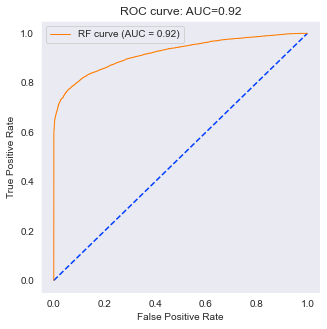

In [15]:
ns_probs = [0 for _ in range(len(y_test2))]
lr_probs = model.predict_proba(x_test2)
lr_probs = lr_probs[:, 1]
lr_probs


# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test2, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test2, lr_probs)

roc_auc_xgb = auc(lr_fpr, lr_tpr)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.plot(lr_fpr, lr_tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_xgb))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC curve: AUC={0:0.2f}'.format(
          roc_auc_xgb))
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Average precision-recall score RF: 0.9407991634991688


Text(0.5, 1.0, '2-class Precision-Recall curve: AUC=0.94')

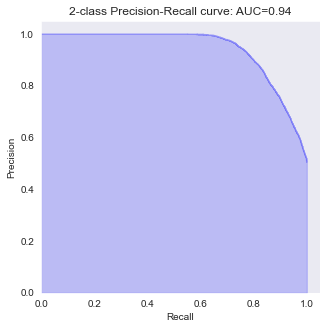

In [16]:
average_precision = average_precision_score(y_test2, lr_probs)

print('Average precision-recall score RF: {}'.format(average_precision))

precision, recall, _ = precision_recall_curve(y_test2, lr_probs)

pr_auc_xgb = auc( recall,precision )

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(
          pr_auc_xgb))

In [17]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

xgb_cv_score = cross_val_score(model_o, x, y, cv=10, scoring='roc_auc')


print("Mean AUC Score - XGBoost: ", xgb_cv_score.mean())

[13:55:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:55:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:55:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:55:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [54]:
random_grid = {
            'learning_rate' : [0.05,0.1,0.15,0.2,0.25,0.3],
             'max_depth' : [3,4,5,6,8,10,12,15],
             'min_child_weight' : [1,3,5,7],
             'gamma' : [0.0,0.1,0.2,0.3,0.4],
             'colsample_bytree' : [0.3,0.4,0.5,0.7]
}


In [55]:
from sklearn.model_selection import RandomizedSearchCV

# Random search of parameters
xgb_random = RandomizedSearchCV(estimator = model_o, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
xgb_random.fit(x_train2, y_train2)
# print results
print(xgb_random.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[16:10:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.15, 'gamma': 0.4, 'colsample_bytree': 0.3}


In [56]:
xgb_random.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

[14:17:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy:  0.9946795838958151
Testing Accuarcy:  0.9420665801988759
[14:17:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old beh

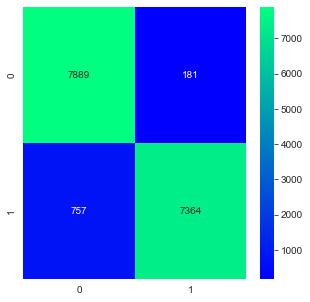



=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8684413010847196


In [18]:
start_time = timer(None)

model_o = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


model_o.fit(x_train2, y_train2)

y_pred = model_o.predict(x_test2)
y_score_xgb = model_o.predict_proba(x_test)[:,-1]
print("Training Accuracy: ", model_o.score(x_train2, y_train2))
print('Testing Accuarcy: ', model_o.score(x_test2, y_test2))
xgb_cv_score = cross_val_score(model_o, x, y, cv=10, scoring='roc_auc')


# classification report
cr = classification_report(y_test2, y_pred)
print(cr)
timer(start_time)

# confusion matrix
cm = confusion_matrix(y_test2, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'winter',fmt=".0f")
plt.show()


print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", xgb_cv_score.mean())

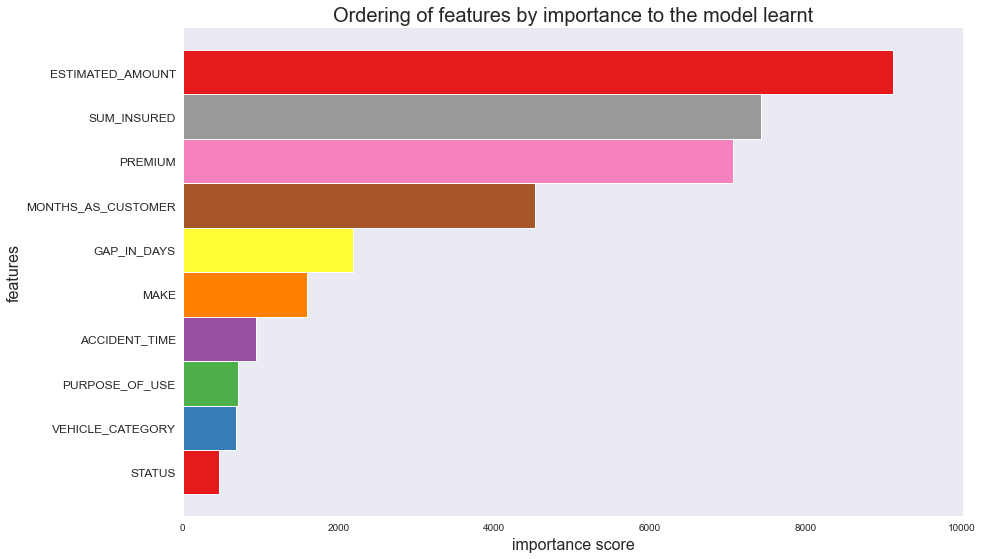

In [71]:
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = xgb.plot_importance(model_o, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'weight', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);

In [19]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 42)
from pprint import pprint

print('Parameters currently in use:\n')
pprint(xgb.get_params())

Parameters currently in use:

{'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'binary:logistic',
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'use_label_encoder': True,
 'validate_parameters': None,
 'verbosity': None}
